In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset Loading
df=pd.read_csv("sales_data.csv")
print("Dataset Loaded Successfully")
df.head(10)

Dataset Loaded Successfully


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [3]:
#Basic EDA
print("Information of dataset:")
df.info()

Information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost          

In [4]:
print("Description of dataset:")
df.describe()

Description of dataset:


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [5]:
#Check missing values
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

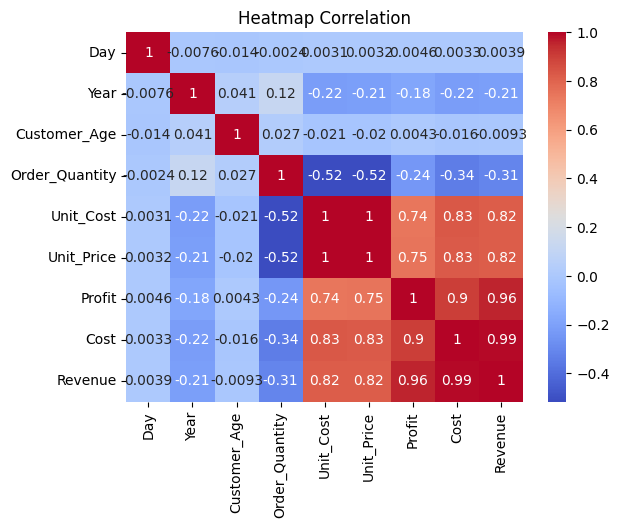

In [6]:
Corr=df.corr(numeric_only=True)
plt.title("Heatmap Correlation")
sns.heatmap(Corr,annot=True,cmap='coolwarm')
plt.show()

In [7]:
#KPI's Computation
#Convert to numeric
df['Order_Quantity']=pd.to_numeric(df['Order_Quantity'])
df['Unit_Price']=pd.to_numeric(df['Unit_Price'])
df['Cost']=pd.to_numeric(df['Cost'])


In [8]:
#Total Revenue
df['Total_Revenue']=df['Order_Quantity'] * df['Unit_Price']
total_revenue=df['Total_Revenue'].sum()
print("Total Revenue is:",total_revenue)

Total Revenue is: 95176318


In [9]:
#Total Profit
df['Profit']=df['Revenue'] - df['Cost']
total_profit=df['Profit'].sum()
print("Total Profit is:",total_profit)

Total Profit is: 32221100


In [10]:
#Average Order Value
Avg=total_revenue/df['Order_Quantity']
print("Average of Orders are:",Avg)

Average of Orders are: 0         1.189704e+07
1         1.189704e+07
2         4.138101e+06
3         4.758816e+06
4         2.379408e+07
              ...     
113031    3.172544e+07
113032    4.326196e+06
113033    4.326196e+06
113034    3.965680e+06
113035    4.138101e+06
Name: Order_Quantity, Length: 113036, dtype: float64


In [11]:
#Profit Margin
margin=(total_profit/total_revenue) *100
print("Profit Margin is:",margin)

Profit Margin is: 33.85411484398881


In [12]:
#Sales of Unit
Unit_sold=sum(df['Order_Quantity'])
print("Units Sold are:",Unit_sold)

Units Sold are: 1345316


In [13]:
#Orders per Customers
orders=df['Order_Quantity']/df['Customer_Age']
print("Orders per Customers are:",orders)

Orders per Customers are: 0         0.421053
1         0.421053
2         0.469388
3         0.408163
4         0.085106
            ...   
113031    0.073171
113032    1.222222
113033    1.222222
113034    0.648649
113035    0.621622
Length: 113036, dtype: float64


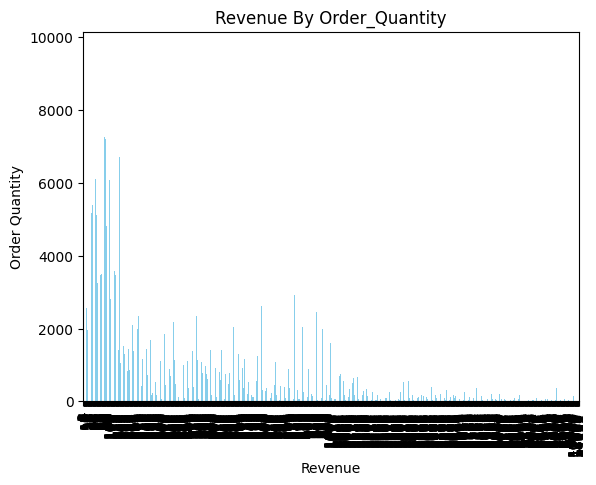

In [14]:
#Visualization
#Revenue By OrderQuantity
grp=df.groupby("Revenue")["Order_Quantity"].sum()
grp.plot(kind='bar',color='skyblue')
plt.title("Revenue By Order_Quantity")
plt.xlabel("Revenue")
plt.ylabel("Order Quantity")
plt.show()


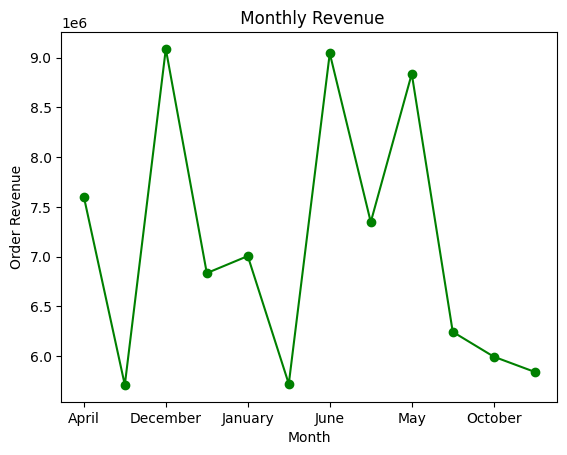

In [15]:
#Monthly Revenue
grp=df.groupby("Month")['Revenue'].sum()
grp.plot(marker='o',color='green')
plt.title(" Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Order Revenue")
plt.show()


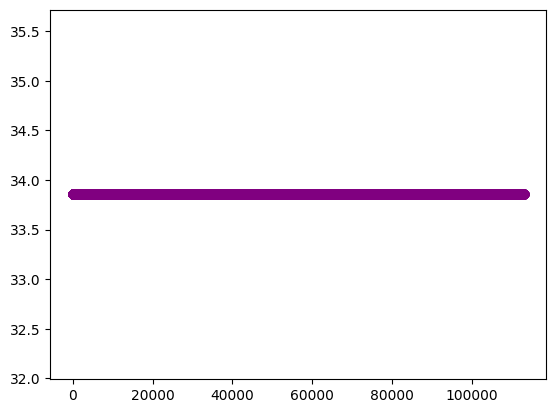

In [28]:
#Profit margin by product category
df['margin']=(total_profit/total_revenue) *100
grp=df.groupby("Product_Category")["margin"]
grp.plot(marker='o',color='purple')
plt.show()

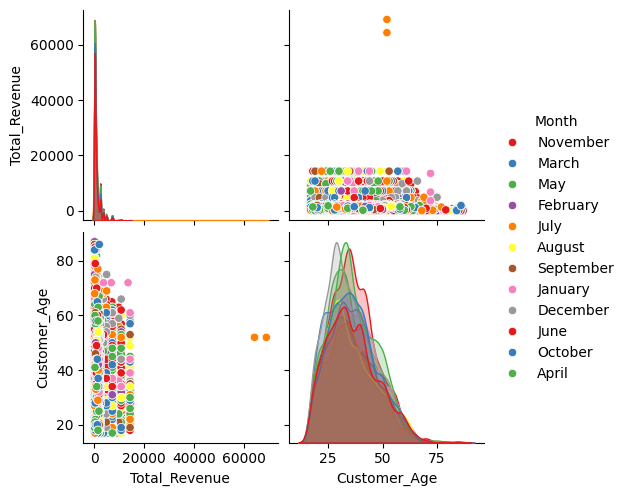

In [29]:
#Visualize mupltiple columns
#Revenue by Customer_Age or Month
sns.pairplot(df[['Total_Revenue','Customer_Age','Month']], hue='Month', palette='Set1')
plt.show()
